# Исследование гипотез для увеличения выручки и А/В-теста интернет-магазина

**Проблема** - Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.<p>
**Задача** - Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. <p>


*Описание данных*<p>
**Данные для первой части:**<p>
Файл /datasets/hypothesis.csv. 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. <p>
•	Hypothesis — краткое описание гипотезы;<p>
•	Reach — охват пользователей по 10-балльной шкале;<p>
•	Impact — влияние на пользователей по 10-балльной шкале;<p>
•	Confidence — уверенность в гипотезе по 10-балльной шкале;<p>
•	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.<p>
    
**Данные для второй части:**<p>
    Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Файл /datasets/orders.csv.<p>
•	transactionId — идентификатор заказа;<p>
•	visitorId — идентификатор пользователя, совершившего заказ;<p>
•	date — дата, когда был совершён заказ;<p>
•	revenue — выручка заказа;<p>
•	group — группа A/B-теста, в которую попал заказ.<p>
Файл /datasets/visitors.csv.<p>
•	date — дата;<p>
•	group — группа A/B-теста;<p>
•	visitors — количество пользователей в указанную дату в указанной группе A/B-теста<p>


**Содержание**<p>
[Загрузка данных](#shag_1)<p>
[Часть 1. Приоритизация гипотез.](#shag_2)<p>
    [Применение фреймворк ICE для приоритизации гипотез.](#shag_2_1)<p>
    [Примените фреймворк RICE для приоритизации гипотез.](#shag_2_1)<p>
    [Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE.](#shag_2_3)<p>
[Часть 2. Анализ A/B-теста.](#shag_3)<p>
	[Постройте график кумулятивной выручки по группам.](#shag_3_1)<p>
	[Постройте график кумулятивного среднего чека по группам.](#shag_3_2)<p>
	[Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.](#shag_3_3)<p>
	[Постройте график кумулятивного среднего количества заказов на посетителя по группам.](#shag_3_4)<p>
	[Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.](#shag_3_5)<p>
	[Постройте точечный график количества заказов по пользователям.](#shag_3_6)<p>
	[Посчитайте 95-й и 99-й перцентили количества заказов на пользователя.](#shag_3_7)<p>
	[Постройте точечный график стоимостей заказов.](#shag_3_8)<p>
	[Посчитайте 95-й и 99-й перцентили стоимости заказов.](#shag_3_9)<p>
	[Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.](#shag_3_10)<p>
	[Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.](#shag_3_11)<p>
	[Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.](#shag_3_12)<p>
	[Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.](#shag_3_13)<p>
	[Примите решение по результатам теста и объясните его.](#shag_3_14)<p>

## Загрузка данных<a id='shag_1'></a>

In [1]:
#загрузка библиотек
import pandas as pd
import numpy as np
import math as mth
import matplotlib.pyplot as plt
from scipy import stats 
import datetime as dt
pd.options.display.max_colwidth = 120

In [2]:
#прочитаем файлы
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv') #прочитаем файл hypothesis
    orders = pd.read_csv('/datasets/hypothesis.csv') #прочитаем файл orders
    visitors = pd.read_csv('/datasets/hypothesis.csv') #прочитаем файл vsitors
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv') #прочитаем файл hypothesis
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv') #прочитаем файл orders
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv') #прочитаем файл visitors

## Часть 1. Приоритизация гипотез.<a id='shag_2'></a>
1.	Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.<p>
2.	Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.<p>
3.	Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.<p>


In [3]:
#посмотрим первые 10 строк файла с гипотезами
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
#посмотрим общую информацию о датафрейме
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Форматы данных корректны

In [5]:
#проверим наличие пропуской
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Пропуски в датафрейме hypothesis отсутствуют

In [6]:
#проверим на дубликаты
hypothesis.duplicated().value_counts()

False    9
dtype: int64

Дубликаты в hypothesis отсутствуют

Вывод:
В датафрейме hypothesis данные корректны, пропуски и дубликаты отсутствуют.

### Применение фреймворк ICE для приоритизации гипотез.<a id='shag_2_1'></a>
Отсортируйте их по убыванию приоритета.

In [7]:
#добавим в датафрейм hypothesis столбец ICE
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Судя по фреймворку ICE наиболее перспектвные гипотезы 8, 0, 7.

### Примените фреймворк RICE для приоритизации гипотез.<a id='shag_2_2'></a>
Отсортируйте их по убыванию приоритета.

In [8]:
#добавим в датафрейм hypothesis столбец RICE
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis.sort_values(by='RICE', ascending=False)


,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Судя по фрейморку RICE наиболее перспективные гипотезы 7, 2, 0, 6.

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE.<a id='shag_2_3'></a>
Объясните, почему так произошло.

По фреймфорку ICE наиболее перспектвные гипотезы 8, 0, 7. 
А по фрейморку RICE наиболее перспективные гипотезы 7, 2, 0, 6. 
Приоритизация гипотез изменилась, т.к. при расчете фреймворка ICE не учитывался показатель Reach, отвечающий за охват пользователей, которых затронет изменение. Поэтому наиболее корректно будет рассматривать приоритизацию гипотез с помощью фреймворка RICE.

## Часть 2. Анализ A/B-теста. <a id='shag_3'></a>
1.	Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.<a id='shag_3_1'></a>
2.	Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3.	Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4.	Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
5.	Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
6.	Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7.	Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8.	Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9.	Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10.	Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
11.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12.	Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
13.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14.	Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.


In [9]:
#посмотрим первые 10 строк файла с заказами и посетителями

display(orders.head(5))
visitors.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
#посмотрим общую информацию о датафрейме
display(orders.info())
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В датафреймах с заказами и посетителями требуется поменять формат дат.

In [11]:
#поменяем формат дат
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [12]:
# проверим смену формата
display(orders['date'].dtypes)
visitors['date'].dtypes


dtype('<M8[ns]')

dtype('<M8[ns]')

Все корректно.

In [13]:
#проверим наличие пропусков
display(orders.isna().sum())
visitors.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

В датафреймах о заказах и посетелителях пропуски отсутствуют.

In [14]:
#проверим на дубликаты
display(orders.duplicated().value_counts())
visitors.duplicated().value_counts()

False    1197
dtype: int64

False    62
dtype: int64

Дубликаты отстутствуют.

Вывод: В датафреймах orders и visitors был изменен формат дат. Пропуски и дубликаты отсутствуют.

### Постройте график кумулятивной выручки по группам.<a id='shag_3_1'></a>
Сделайте выводы и предположения.

In [15]:
# создаем массив уникальных пар значений дат и групп 
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x:orders
    [
        np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
    ].agg({
        'date':'max',
        'group':'max',
        'transactionId':'nunique',
        'visitorId':'nunique',
        'revenue':'sum'
    }),axis=1
).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x:visitors
    [
        np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])
    ].agg({
        'date':'max', 
        'group':'max', 
        'visitors':'sum'}),axis=1
).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и переименовываем столбцы
#orders - число уникальных заказов в группе теста по указанную дату включительно
#buyers - число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно
#revenue - суммарную выручку заказов в группе теста по указанную дату включительно
#visitors - количество уникальных посетителей в группе теста по указанную дату включительно
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date','group'], right_on=['date','group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

#посмотрим первые 5 строк
cumulativeData.head(5)


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


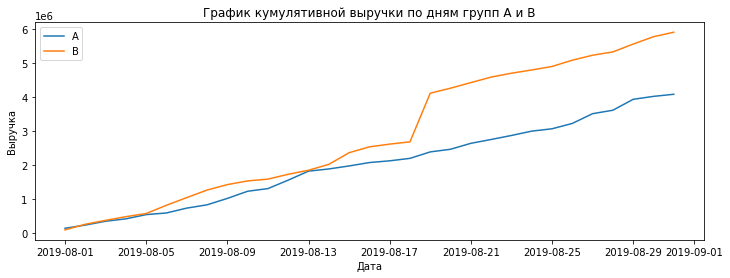

In [16]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(12,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('График кумулятивной выручки по дням групп А и В')
plt.legend()
plt.show()

Вывод:
Как видно на графике выручки по дням групп А и В:
- выручка группы В больше выручки группы А.
- выручка увеличивается в течение всего теста.График группы А растет плавно. На графике группы В виден резкий скачок после которого график так и продолжает расти, возможно был всплеск числа заказов и пока он держится, либо появлись очень дорогие заказы в выборке, либо произошли какие-то изменения положительно влияющие на продажи.

### Постройте график кумулятивного среднего чека по группам.<a id='shag_3_2'></a>
Сделайте выводы и предположения.

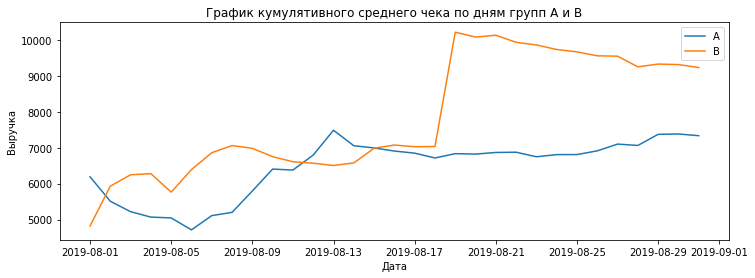

In [17]:
# строим график среднего чеко группы А
plt.figure(figsize=(12,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# строим график среднего чеко группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')


plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего чека по дням групп А и В')
plt.legend()
plt.show()

Выводы:
Как видно на графике кумулятивного среднего чека по дням групп А и В:
- средний чек группы В больше чем средний чек группы А.
- средний чек группы А становится более равномерным ближе к концу теста, на графике в середине теста был небольшой скачок - вероятнее всего какие-то крупные заказы.
- средний чек группы В продолжает падать, на графике наблюдается резкий скачок, скорее всего в середине теста появились крупные заказы. Предполагаю, что группе В нужно больше данных чтобы прийти к реальному среднему чеку и установиться на его уровне.


### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.<a id='shag_3_3'></a>
Сделайте выводы и предположения.


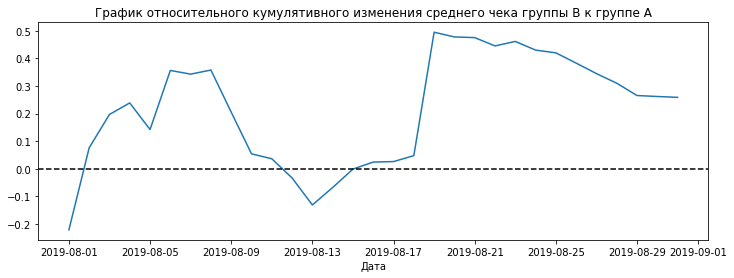

In [18]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12,4))
plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
    /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.xlabel('Дата')
plt.title('График относительного кумулятивного изменения среднего чека группы В к группе А')
plt.show()

Вывод:
Как видно на графике относительного кумулятивного изменения среднего чека группы В к группе А, в нескольких точках график скачет, предполгаю, что это из-за крупных заказов и выбросов в эти даты.

### Постройте график кумулятивного среднего количества заказов на посетителя по группам.<a id='shag_3_4'></a> 
Сделайте выводы и предположения.


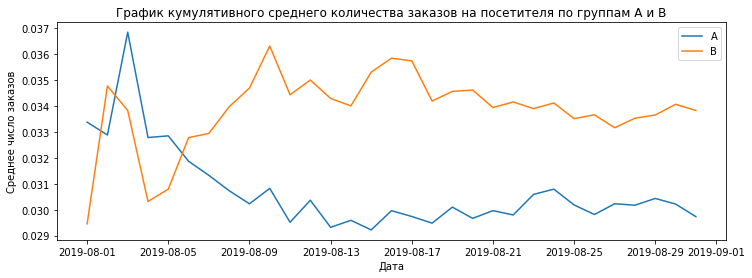

In [19]:
# считаем кумулятивное среднее количества заказов на посетителя по группам
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.ylabel('Среднее число заказов')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам А и В')
plt.legend()
plt.show()

Вывод:
На графике кумулятивного среднего количества заказов на посетителя по группам А и В видно, что:
- конверсия группы В выше чем конверсия группы А,
- к концу теста колебания графиков незначительные. 

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.<a id='shag_3_5'></a>
Сделайте выводы и предположения.


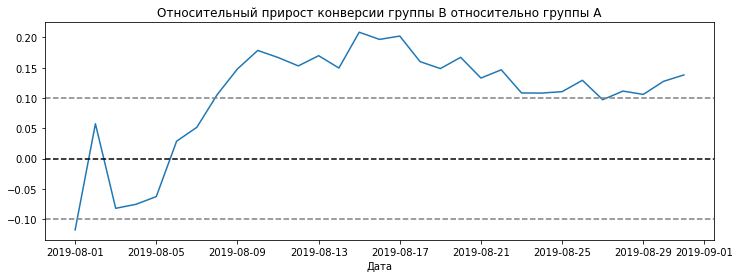

In [20]:
# собираем данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']
                                             ].merge(cumulativeDataB[['date','conversion']]
                                                     , left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# cтроим отношениz конверсии
plt.figure(figsize=(12,4))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.xlabel('Дата')
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

plt.show()

Вывод:
На графике относительного прироста конверсии группы В относительно группы А видно, что конверсия среднего количества заказов на посетителя выше у группы В, в самом начале теста были колебания, затем начиная с 2019-08-07 конверсия группы В стала лучше более чем на 10 %.

### Постройте точечный график количества заказов по пользователям.<a id='shag_3_6'></a>
Сделайте выводы и предположения.


In [21]:
#подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
    .sort_values(by='transactionId', ascending=False)
)
#переименуем столбцы
ordersByUsers.columns = ['visitorId', 'transaction']
ordersByUsers.head(5)

,visitorId,transaction
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


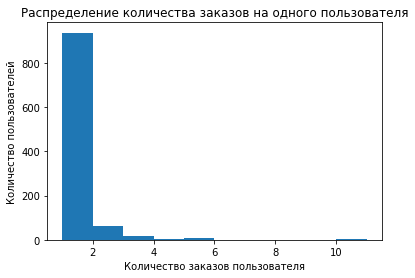

In [22]:
#построим гистрограмму распределения количества заказов на одного пользователя
plt.hist(ordersByUsers['transaction'])
plt.ylabel('Количество пользователей')
plt.xlabel('Количество заказов пользователя')
plt.title('Распределение количества заказов на одного пользователя')
plt.show()

Большинство пользователей покупают один раз, но есть и 10.

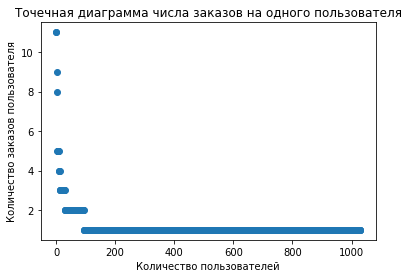

In [23]:
#построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['transaction']) 
plt.ylabel('Количество заказов пользователя')
plt.xlabel('Количество пользователей')
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.show()

Вывод:
На гистограмме Распределение количества заказов на одного пользователя и диаграмме Точечная диаграмма числа заказов на одного пользователя видно, что большинство пользователей совершают один заказ, совсем немного пользователей совершают 2-3 заказа. Более 4-х заказов совершают единицы.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя.<a id='shag_3_7'></a>
Выберите границу для определения аномальных пользователей.


In [24]:
#посчитаем выборочные перцентили количества заказов на одного пользователя
percentile = np.percentile(ordersByUsers['transaction'], [95, 99])
print( '95-й перцентиль:', percentile[0],'\n'  
'99-й перцентиль:', percentile[1])



95-й перцентиль: 2.0 
99-й перцентиль: 4.0


Вывод:
Не более 5% пользователей, совершивших заказ делают больше 2 заказов.
Не более 1 %  пользователей, совершивших заказ делают больше 4 заказов.

### Постройте точечный график стоимостей заказов.<a id='shag_3_8'></a>
Сделайте выводы и предположения.


In [25]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [26]:
orders['revenue'].max()

1294500

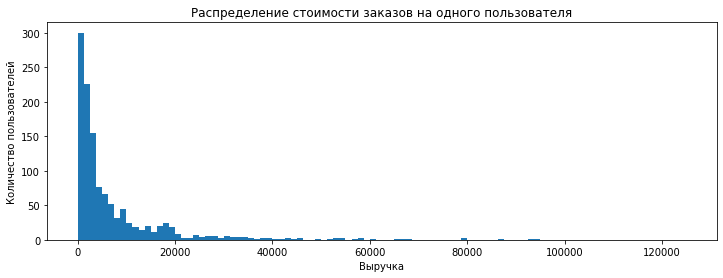

In [27]:
#построим гистрограмму распределения стоимости заказов на одного пользователя
plt.figure(figsize=(12,4))
plt.hist(orders['revenue'],bins=100,range=(0,125000)
        )
plt.ylabel('Количество пользователей')
plt.xlabel('Выручка')
plt.title('Распределение стоимости заказов на одного пользователя')
plt.show()

Большинство заказов находится в пределах до 20000.

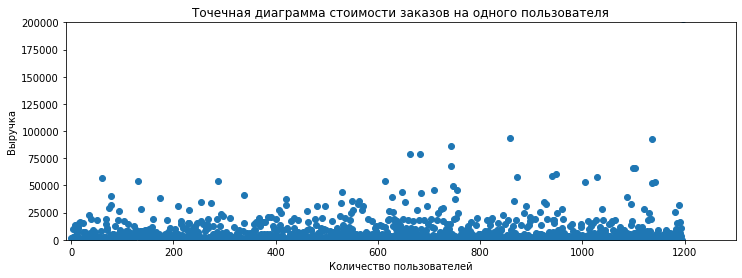

In [28]:
#построим точечную диаграмму стоимости заказов на одного пользователя
x_values = pd.Series(range(0,len(orders)))

plt.figure(figsize=(12,4))

plt.scatter(x_values, orders['revenue']) 
plt.axis([-10, 1300, 0, 200000])
plt.ylabel('Выручка')
plt.xlabel('Количество пользователей')
plt.title('Точечная диаграмма стоимости заказов на одного пользователя')
plt.show()

Вывод:
Как видно на  графиках Распределение стоимости заказов на одного пользователя и Точечная диаграмма стоимости заказов на одного пользователя большинство пользователей совершают заказ до 25000, заказов от 25000 до 40000 крайне мало.

### Посчитайте 95-й и 99-й перцентили стоимости заказов.<a id='shag_3_9'></a> 
Выберите границу для определения аномальных заказов.


In [29]:
#посчитаем выборочные перцентили стоимости заказов на одного пользователя
percentile = np.percentile(orders['revenue'], [95, 99])
print( '95-й перцентиль:', round(percentile[0],2),'\n'  
'99-й перцентиль:', round(percentile[1],2))


95-й перцентиль: 28000.0 
99-й перцентиль: 58233.2


Вывод:
Не более чем у 5% заказовов чек дороже 28000.
Не более чем у 1% заказов чек дороже 58233.2.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.<a id='shag_3_10'></a> 
Сделайте выводы и предположения.


In [30]:
#создадим переменную, в которой сгруппируем количество пользователей по дням группа А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
#переименуем столбцы
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# получаем агрегированные кумулятивные по дням данные о пользователях 
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
#переименуем столбцы
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#создадим переменную, в которой сгруппируем количество пользователей по дням группа В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
#переименуем столбцы
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# получаем агрегированные кумулятивные по дням данные о пользователях 
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
#переименуем столбцы
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#создадим переменную с количеством заказов и суммарной выручкой по дням, группа А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})

)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# получаем агрегированные кумулятивные по дням данные суммарное число заказов до выбранной даты, 
#суммарная выручка до выбранной даты, группа А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
#создадим переменную с количеством заказов и суммарной выручкой по дням, группа В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
# получаем агрегированные кумулятивные по дням данные суммарное число заказов до выбранной даты, 
#суммарная выручка до выбранной даты, группа B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,

).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

#объединим таблицы
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


In [31]:
# создадим переменну для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов, по группе А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
#переименуем столбцы
ordersByUsersA.columns = ['visitorId', 'transaction']


# создадим переменную для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов, по группе В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
#переименуем столбцы
ordersByUsersB.columns = ['visitorId', 'transaction'] 

In [32]:
print(
    'Количество пользователей группы А:', ordersByUsersA['visitorId'].count(),'\n'
    'Количество покупок группы А:',ordersByUsersA['transaction'].sum(),'\n'
    'Количество пользователей группы В:', ordersByUsersB['visitorId'].count(),'\n'
    'Количество покупок группы В:',ordersByUsersB['transaction'].sum(),'\n'
)


Количество пользователей группы А: 503 
Количество покупок группы А: 557 
Количество пользователей группы В: 586 
Количество покупок группы В: 640 



Нулевая гипотеза - среднее количество заказов на посетителя группы В  по "сырым" данным равно среднему количеству заказов на посетителя  группы А по "сырым" данным,

Альтернативная гипотеза - среднее количество заказов на посетителя группы В по "сырым" данным не равно среднему количеству заказов на посетителя группы А по "сырым" данным.

In [33]:
#создадим переменные в которых пользователям из разных групп будет соответствовать количество заказов. 
#Тем, кто ничего не заказал, будут соответствовать нули. 
#для группы А
sampleA = pd.concat(
    [
        ordersByUsersA['transaction'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#для группы В
sampleB = pd.concat(
    [
        ordersByUsersB['transaction'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# критический уровень статистической значимости
alpha = 0.05
#применим метод Уилкоксона-Манна-Уитни
results = stats.mannwhitneyu(sampleA, sampleB)

print('P-value: {0:.3f}'.format(results.pvalue))

if results.pvalue < alpha:
      print('Отвергаем нулевую гипотезу: разница статистически значима(по "сырым" данным)')
else:
      print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя(по "сырым" данным)')
        
print("Относительный прирост среднего группы В к конверсии группы А равен:{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
Отвергаем нулевую гипотезу: разница статистически значима(по "сырым" данным)
Относительный прирост среднего группы В к конверсии группы А равен:0.138


Вывод: По "сырым" данным р-value 0.017 меньше уровня статистической значимости, поэтому нулевую гипотезу отвергаем. Анализ "сырых" данных показывает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А составил 0.138 (13.8%).
    

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.<a id='shag_3_11'></a> 
Сделайте выводы и предположения.


Нулевая гипотеза - средний чек заказа группы В  по "сырым" данным равен среднему чеку заказа группы А по "сырым" данным,

Альтернативная гипотеза - средний чек заказа группы В по "сырым" данным не равен среднему чеку заказа группы А по "сырым" данным.

In [34]:
#применим метод Уилкоксона-Манна-Уитни
results_revenue = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('P-value: {0:.3f}'.format(results_revenue.pvalue))

if results_revenue.pvalue < alpha:
      print('Отвергаем нулевую гипотезу: разница статистически значима(по "сырым" данным)')
else:
      print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя(по "сырым" данным)')
        
        
        
print('Относительное различие среднего чека между сегментами равно:{0:.3f}'.
      format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя(по "сырым" данным)
Относительное различие среднего чека между сегментами равно:0.259


Вывод: По "сырым" данным р-value 0.729 больше уровня статистической значимости, поэтому нулевую гипотезу не отвергаем, статистически значимых отличий в среднем чеке между группами нет.
Относительное различие среднего чека между сегментами составляет 0.259(25.9%) - средний чек группы В значительно выше среднего чека группы А.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.<a id='shag_3_12'></a>
Сделайте выводы и предположения.


Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 35 000 рублей.

In [35]:
#определим сколько всего аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transaction'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['transaction'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 35000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 


1099    148427295
18      199603092
23      237748145
37      249864742
684     358944393
Name: visitorId, dtype: int64
53


Всего 53 аномальных пользователя.

In [36]:
#подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transaction'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction'])
            ),
            name='transaction',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transaction'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction'])
            ),
            name='transaction',
        ),
    ],
    axis=0,
) 

Нулевая гипотеза - среднее количество заказов на посетителя группы В  по "очищенным" данным равно среднему количеству заказов на посетителя  группы А по "очищенным" данным,

Альтернативная гипотеза - среднее количество заказов на посетителя группы В по "очищенным" данным не равно среднему количеству заказов на посетителя группы А по "очищенным" данным.

In [37]:
#применим статистический критерий Манна-Уитни к полученным выборкам
results_abnormal = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
                             
print('P-value: {0:.3f}'.format(results_abnormal.pvalue))

if results_abnormal.pvalue < alpha:
      print('Отвергаем нулевую гипотезу: разница статистически значима(по "очищенным" данным)')
else:
      print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя(по "очищенным" данным)')
    
print("Относительный прирост среднего группы В к конверсии группы А по 'очищенным' данным равен:{0:.3f}".
      format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.010
Отвергаем нулевую гипотезу: разница статистически значима(по "очищенным" данным)
Относительный прирост среднего группы В к конверсии группы А по 'очищенным' данным равен:0.179


Вывод:
По "очищенным" данным p-value 0.010 меньше уровня статистической значимости, поэтому нулевую гипотезу отвеграем. Анализ "очищенных" данных показывает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А составляет 0.179 (17.9%). По сравнению с "сырыми" данными результаты изменились незначительно.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.<a id='shag_3_13'></a> 
Сделайте выводы и предположения.


Нулевая гипотеза - средний чек заказа группы В  по "очищенным" данным равен среднему чеку заказа группы А по "очищенным" данным,

Альтернативная гипотеза - средний чек заказа группы В по "очищенным" данным не равен среднему чеку заказа группы А по "очищенным" данным.

In [38]:
#применим метод Уилкоксона-Манна-Уитни
results_revenue_abnormal = stats.mannwhitneyu(
    orders[np.logical_and(orders['group'] == 'A', 
                          np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],
    orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'])

print('P-value: {0:.3f}'.format(results_revenue_abnormal.pvalue))

if results_revenue_abnormal.pvalue < alpha:
      print('Отвергаем нулевую гипотезу: разница статистически значима(по "очищенным" данным)')
else:
      print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя(по "очищенным" данным)')
        
        
        
print('Относительное различие среднего чека по "очищенным" данным между сегментами равно:{0:.3f}'
      .format(orders[np.logical_and(orders['group'] == 'B',
                                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()/
              orders[np.logical_and(orders['group'] == 'A',
                                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1)) 


P-value: 0.885
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя(по "очищенным" данным)
Относительное различие среднего чека по "очищенным" данным между сегментами равно:0.022


Вывод:
По "очищенным" данным p-value 0.885 больше уровня статистической значимости, поэтому нулевую гипотезу не отвергаем, статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между сегментами составляет 0.022(2.2%) - средний чек группы В выше среднего чека группы А. 
По сравнению с "сырыми" данными p-value увеличился с 0.729 до 0.885, но разница между сегментами сократилась с 25.9% до 2.2%

### Примите решение по результатам теста и объясните его.<a id='shag_3_14'></a>
Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.


**Выводы по А/В тесту:**

В течение всего теста метрики группы В (выручка, конверсия) лидировали над метриками группы А.
Однако существенные колебания на графике кумулятивного среднего чека по группам и существенное относительное различие среднего чека между сегментами(25.9%) при отсутствии статистической значимости указывают на влияние аномальных значений. Это подтверждается данными существенного оносительного различия среднего чека между сегметами после "очистки" от аномалий, показатель составил 2.2% (вместо 25.9%).
В среднем количестве заказов между группами есть статистически значимые различия и до очистки данных, и после. Относительный прирост среднего группы В к конверсии группы А до очистки составил 13.8%, после очистки данных - 17.9%. Таким образом, сделаем вывод - показатели группы В успешнее (число заказов растет, средний чек не меняется), чем показатели группы А поэтому **тест остановить, признать победу группы В.**


